<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 9: Filterung
## Synthetischer Brockenpluton: create irregular data
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

We use a synthetic data set of the **Brocken pluton** for testing our filter algorithms.
<img src="figures/brockenpluton.jpg" style=width:10cm>

Our tasks are:
- create irregular synthetic data, add random noise, add linear trend
- create gridd data from irregular data
- detrend data (least squares fit)
- upward continuation of data (FFT)
- spatial derivatives of data (FFT)
- ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import lib_modelling
tiny=1e-15

In [2]:
lib_modelling.change_fontsize(SMALL_SIZE=12)

----
## Create irregular data set

We first create irregular data for the synthetic Brocken pluton example.


In [3]:
#  define number of points and extent of gridded domain
n = 1000
xmin=-50000; xmax=50000
ymin=-50000; ymax=50000

# create irregular x/y coordinates
np.random.seed(123)
x_irr = np.random.random(n)
y_irr = np.random.random(n)
x_irr = xmin + (xmax-xmin)*x_irr
y_irr = ymin + (ymax-ymin)*y_irr

# calculate Bouger gravity for irregular points with sphere
boug_irr = np.zeros_like(x_irr)
for i in range(n):
    gx,gy,gz = lib_modelling.grav_sphere(xo=x_irr[i],yo=y_irr[i],zo=0,xp=0,yp=0,
                                                  zp=25.e3,radius=20.e3,rho=200)
    boug_irr[i] =boug_irr[i] + gz

----
## Add random noise to data

In [4]:
# Add random noise to Bouguer gravity
boug_irr = boug_irr + 0.9*((np.random.random(n)-0.5)*2)

Text(0.5, 0, 'Gravity [mGal]')

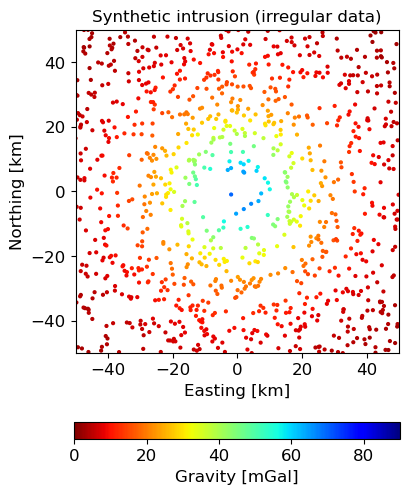

In [5]:
fig,axs = plt.subplots(1,1,figsize=(6.0,6.0))
color_levels=[0,10,20,30,40,50,60,70,80,90]
axs.set_aspect('equal')
axs.set_title('Synthetic intrusion (irregular data)')
axs.set_xlabel('Easting [km]')
axs.set_ylabel('Northing [km]')
axs.set_xlim([xmin/1e3,xmax/1e3])
axs.set_ylim([ymin/1e3,ymax/1e3])
CS1=axs.scatter(x_irr/1e3,y_irr/1e3,marker='o',s=4,c=boug_irr,cmap=plt.cm.jet_r,vmin=0,vmax=90)
cbar = fig.colorbar(CS1,ax=axs,orientation="horizontal",shrink=0.7)
cbar.ax.set_xlabel('Gravity [mGal]')

----
## Add trend to data set

We finally add a **linear trend surface** to the data set:
$$
trend(x,y,a_0,a_1,a_2) = a_0 + a_1 x + a_2 y
$$

Thus,
$$
\Delta g_B(x,y) = \Delta g_B(x,y) + trend(x,y) 
$$

In [6]:
def plane(x,y,*args):
    # define trend surface for x,y points
    plane = args[0] + x*args[1] + y*args[2] + x*y*args[3]
    return plane

# define range of trend for Bouguer data and calculate trend
a0 = 20
a1 = a0/(xmax-xmin)
a2 = a1
print('a0,a1,a2: ',a0,a1,a2)
trend = plane(x_irr,y_irr,a0,a1,a2,0)
print(trend.min(),trend.max())

#plt.contourf(X/1.e3,Y/1.e3,trend)

# add to irregular data
boug_irr +=trend

a0,a1,a2:  20 0.0002 0.0002
0.5135256127948757 38.96342150865511


Text(0.5, 0, 'Gravity [mGal]')

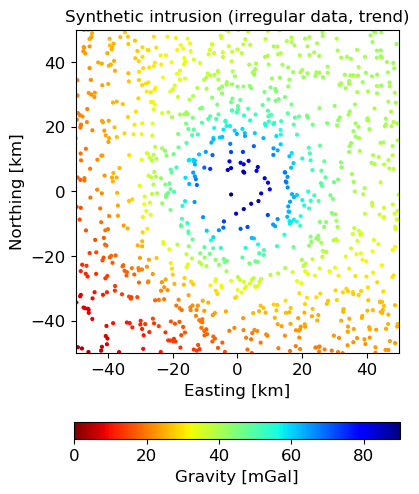

In [7]:
ig,axs = plt.subplots(1,1,figsize=(6.0,6.0))
color_levels=[0,10,20,30,40,50,60,70,80,90]
axs.set_aspect('equal')
axs.set_title('Synthetic intrusion (irregular data, trend)')
axs.set_xlabel('Easting [km]')
axs.set_ylabel('Northing [km]')
axs.set_xlim([xmin/1e3,xmax/1e3])
axs.set_ylim([ymin/1e3,ymax/1e3])
CS1=axs.scatter(x_irr/1e3,y_irr/1e3,marker='o',s=4,c=boug_irr,cmap=plt.cm.jet_r,vmin=0,vmax=90)
cbar = fig.colorbar(CS1,ax=axs,orientation="horizontal",shrink=0.7)
cbar.ax.set_xlabel('Gravity [mGal]')

----
## Save data to file

In [8]:
outfile = 'Brocken_irr.npy'
np.save(outfile,[x_irr,y_irr,boug_irr])

[next>](AGII_chap09_Brocken_gridded.ipynb)

----